# Project: Investigate TMDB Data Analysis
> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. and in particular, 


--------

# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

--------

<a id='intro'></a>
## Introduction

> In this project we'll go through the Dataset in order to answer the below questions:
* What's the average movies runtime throughout the decades?
* What're the most used keywords in movies?
* Who's the most successful director ever?
* What're the most profitable movies in our Dataset?
* How many movies were produced every year?

--------

<a id='wrangling'></a>
# Data Wrangling:
> Let's take a deep look at our Dataset to ask the right questions. But first, let's import the tools we're gonna need to get the job done

In [8]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
sns.set(color_codes = True)

### General Properties

In [12]:
# call our dataset
df = pd.read_csv('tmdb_movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


--------

## Data Cleaning
> To make sure you'll get correct results, you gotta clean and arrange your data properly first

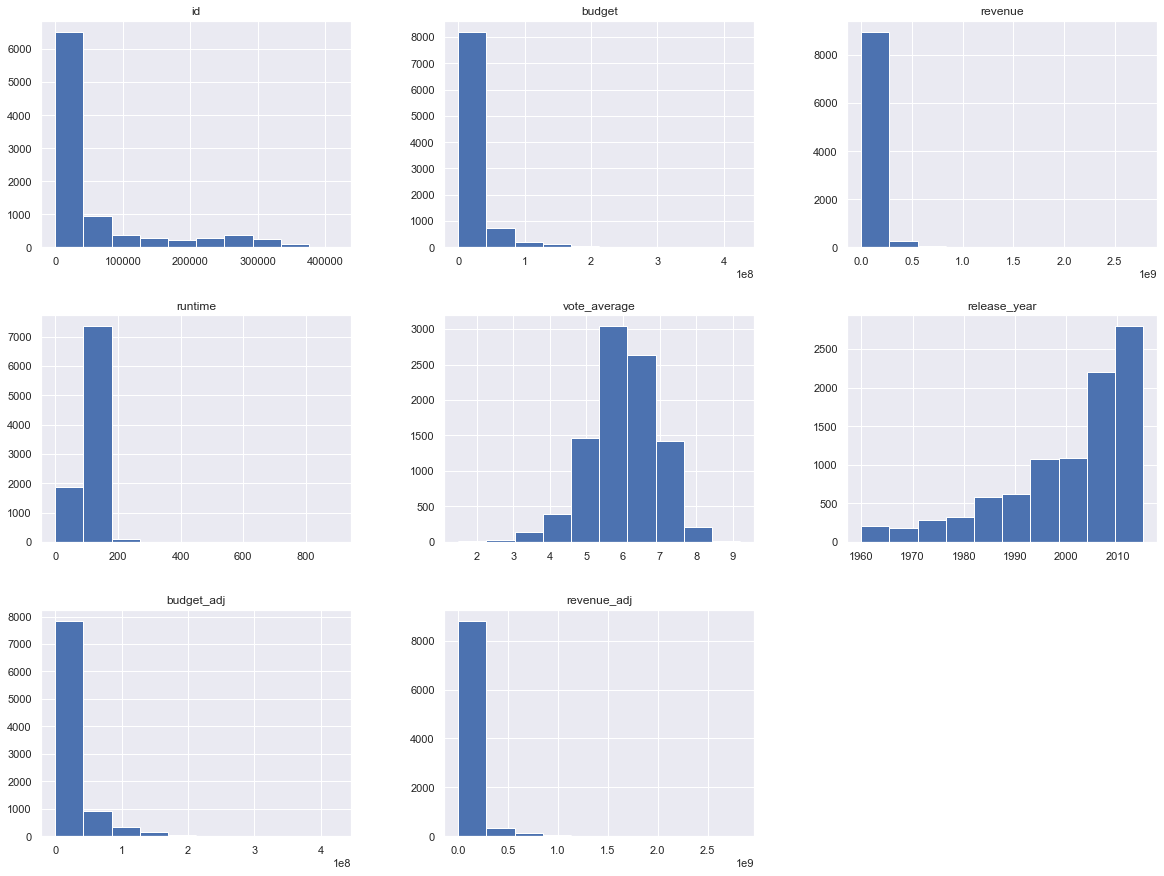

In [18]:
# let's visualize how our data set looks like
df.hist(figsize=(20, 15));

--------

In [10]:
df.shape

(10866, 21)

In [11]:
list(df.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

--------

In [13]:
# Drop the un-needed columns 
df.drop(['popularity','cast','tagline','overview','production_companies','homepage','vote_count'],axis=1, inplace=True)
df.head(2)

,id,imdb_id,budget,revenue,original_title,director,keywords,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   imdb_id         10856 non-null  object 
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   director        10822 non-null  object 
 6   keywords        9373 non-null   object 
 7   runtime         10866 non-null  int64  
 8   genres          10843 non-null  object 
 9   release_date    10866 non-null  object 
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(3), int64(5), object(6)
memory usage: 1.2+ MB


In [66]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [15]:
#Check the duplicates
print(df.duplicated().sum())

1


In [16]:
# remove the null data 

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9349 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9349 non-null   int64  
 1   imdb_id         9349 non-null   object 
 2   budget          9349 non-null   int64  
 3   revenue         9349 non-null   int64  
 4   original_title  9349 non-null   object 
 5   director        9349 non-null   object 
 6   keywords        9349 non-null   object 
 7   runtime         9349 non-null   int64  
 8   genres          9349 non-null   object 
 9   release_date    9349 non-null   object 
 10  vote_average    9349 non-null   float64
 11  release_year    9349 non-null   int64  
 12  budget_adj      9349 non-null   float64
 13  revenue_adj     9349 non-null   float64
dtypes: float64(3), int64(5), object(6)
memory usage: 1.1+ MB


In [17]:
# remove the duplicated data

df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


> As we can see, around 50% of the revenue and budget values are 0. And in order to solve this issue we either replace it with the mean or drop all the missing rows. However, since it's almost half of the data, the outcome won't be reliable. So, we'll consider the 0 values in revenue as if those movies didn't gain any revenue at all and the given values are actually, correct.

--------

<a id='eda'></a>
# Exploratory Data Analysis

> Now we have cleaned our dataset, and It's time to analyze it and answer our questions one by one.


### Q: What's the average movies runtime throughout the decades?

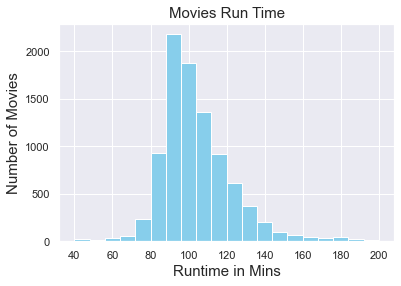

In [19]:
# Now we'll see the number of movies with each runtime in minutes

plt.hist(df['runtime'], range=(40,200), bins=20, color = "skyblue")
plt.title('Movies Run Time', fontsize = 15)
plt.xlabel('Runtime in Mins', fontsize = 15)
plt.ylabel('Number of Movies', fontsize = 15)
plt.show()

> Ok, so most overall movies' runtime is 90 minutes, but has it always been the most popular?

--------

In [21]:
# Now we'll get the average runtime of all the movies in each year

grouped_movies = df['runtime'].groupby(df['release_year']).describe()

# we got the movies grouped

In [23]:
# now let's get the average, the minimum and the maximum

avg_runtime_by_year = grouped_movies ['mean']
avg_runtime_min = grouped_movies ['mean'] - grouped_movies ['std']
avg_runtime_max = grouped_movies ['mean'] + grouped_movies ['std']

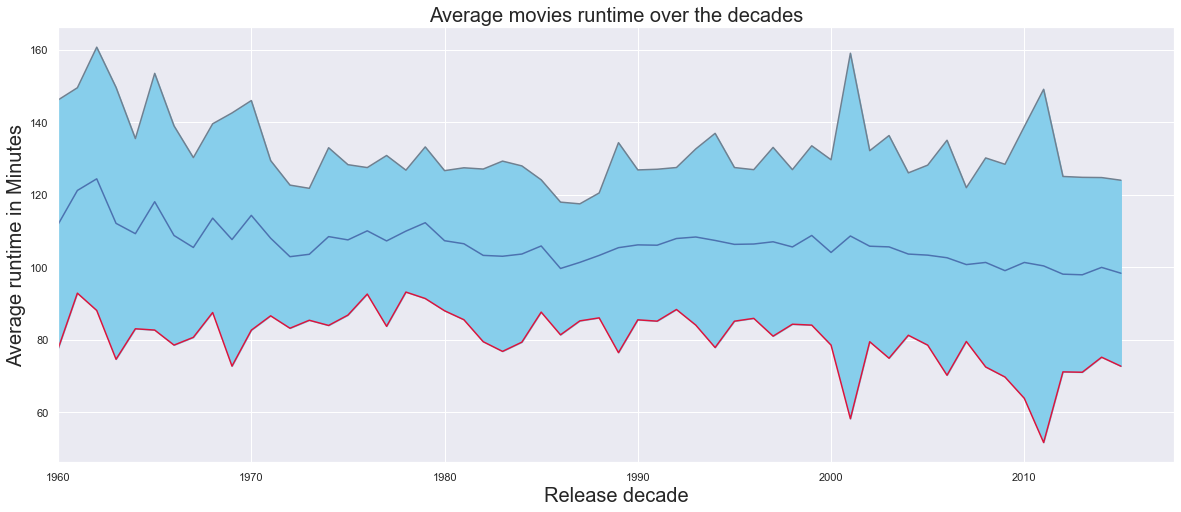

In [24]:
# lets create a subplot to visualize it

fig, x = plt.subplots(figsize=(20,8))
x.plot(avg_runtime_by_year)
x.plot(avg_runtime_min, color = 'crimson')
x.plot(avg_runtime_max, color = 'slategray')
x.fill_between(grouped_movies.index, avg_runtime_min, avg_runtime_max, color = 'skyblue')
x.set_title('Average movies runtime over the decades', fontsize = 20)
x.set_xlabel('Release decade', fontsize = 20)
x.set_ylabel('Average runtime in Minutes', fontsize = 20)
x.set_xlim(1960)
plt.show()

> That's about right, 90 to 120 minutes seems like the average throughout the decades

--------

### Q: Who's the most successful director ever?

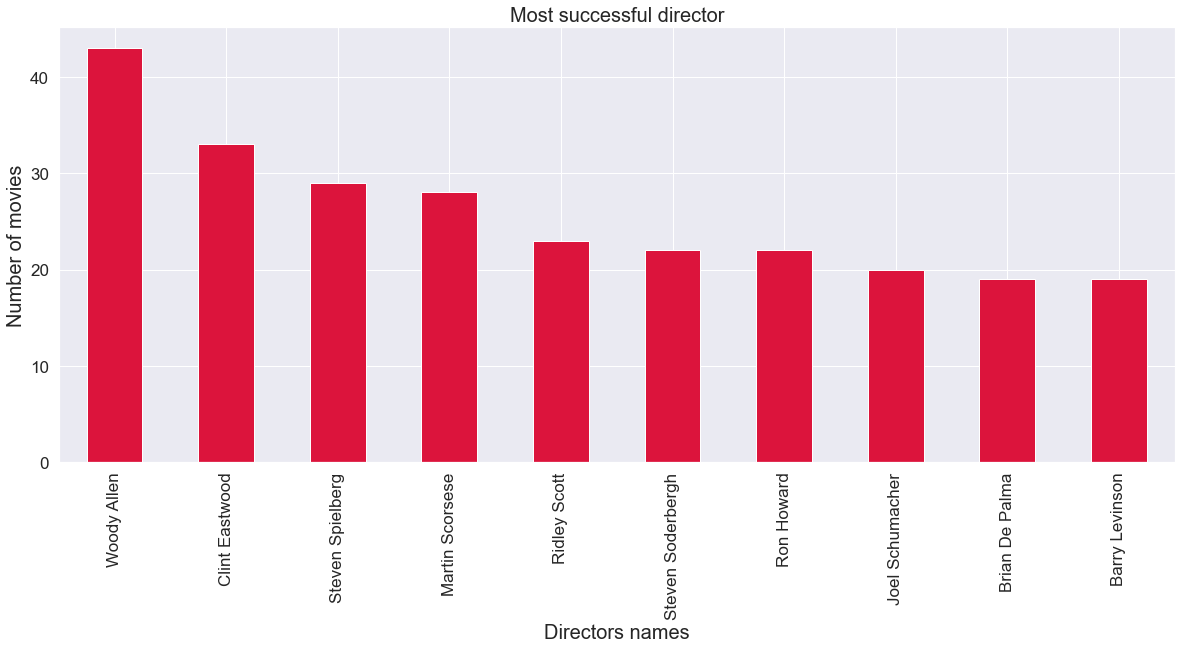

In [25]:
# Now we'll count the number of each time a director's name was mentioned, to know the number of movies he made

df['director'].value_counts().head(10).plot.bar(figsize=(20,8), fontsize=17, color='crimson');
plt.title('Most successful director', fontsize = 20)
plt.xlabel('Directors names', fontsize = 20)
plt.ylabel('Number of movies', fontsize = 20)
plt.show()

> from the given data, the director with most movies in the list is 'Woody Allen'. but that's debateable.

--------

### Q: What're the most used keywords in movies?

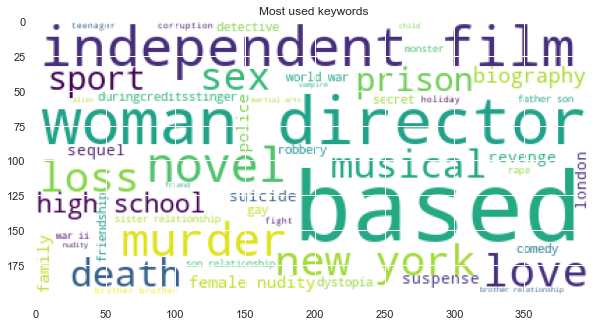

In [26]:
# let's get the most repeated words in the Keywords section, we'll use WordCloud for this one
text = ','.join(df['keywords'].str.cat(sep='|').split('|'))
wc = WordCloud(max_words=50, background_color='white').generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.title("Most used keywords")
plt.show()

> Well, by the looks of it we can tell that "Based, Independent, and director" were the most common words among the given keywords.

--------

### Q: What're the most profitable movies in our Dataset?

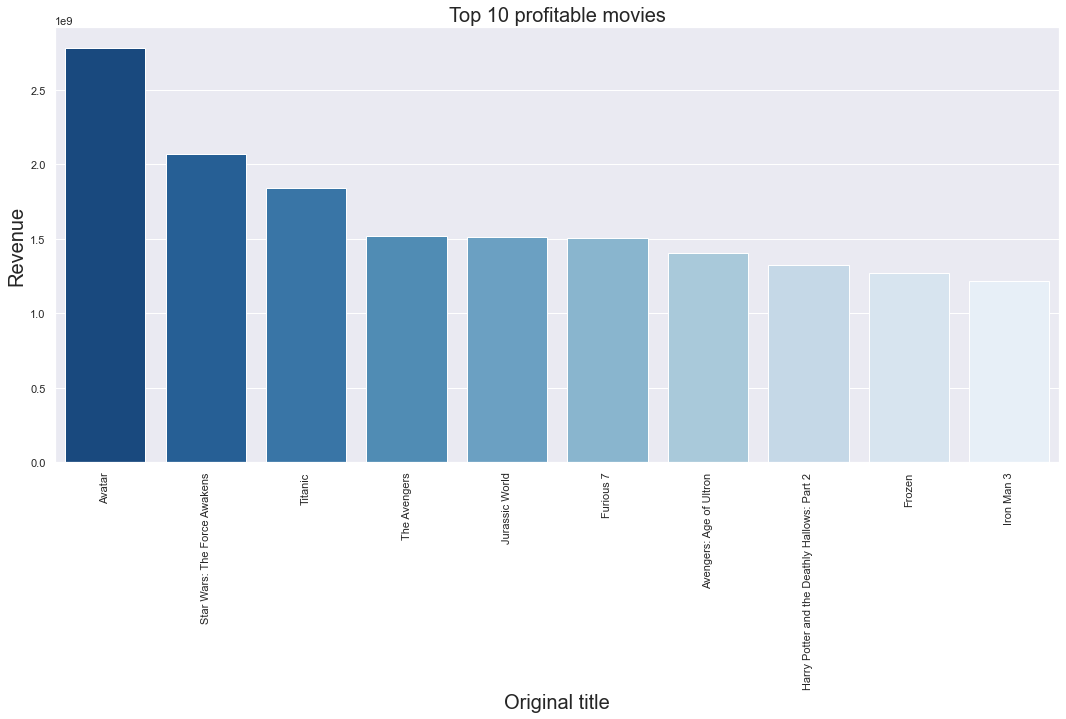

In [27]:
# Now we'll arrange the movies by their profit

plt.figure(figsize=(18,8))
X = df[['original_title', 'revenue']].sort_values('revenue', ascending=False).head(10)
sns.barplot(x='original_title', y= 'revenue', data=X, palette='Blues_r')
plt.title('Top 10 profitable movies', fontsize = 20)
plt.xlabel('Original title', fontsize = 20)
plt.ylabel('Revenue', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

> James Cameron's "Avatar", along other movies conclude the list of the top 10 most profitable movies of all time

--------

### Q: How many movies were produced every year?

C:\Users\pc gamer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


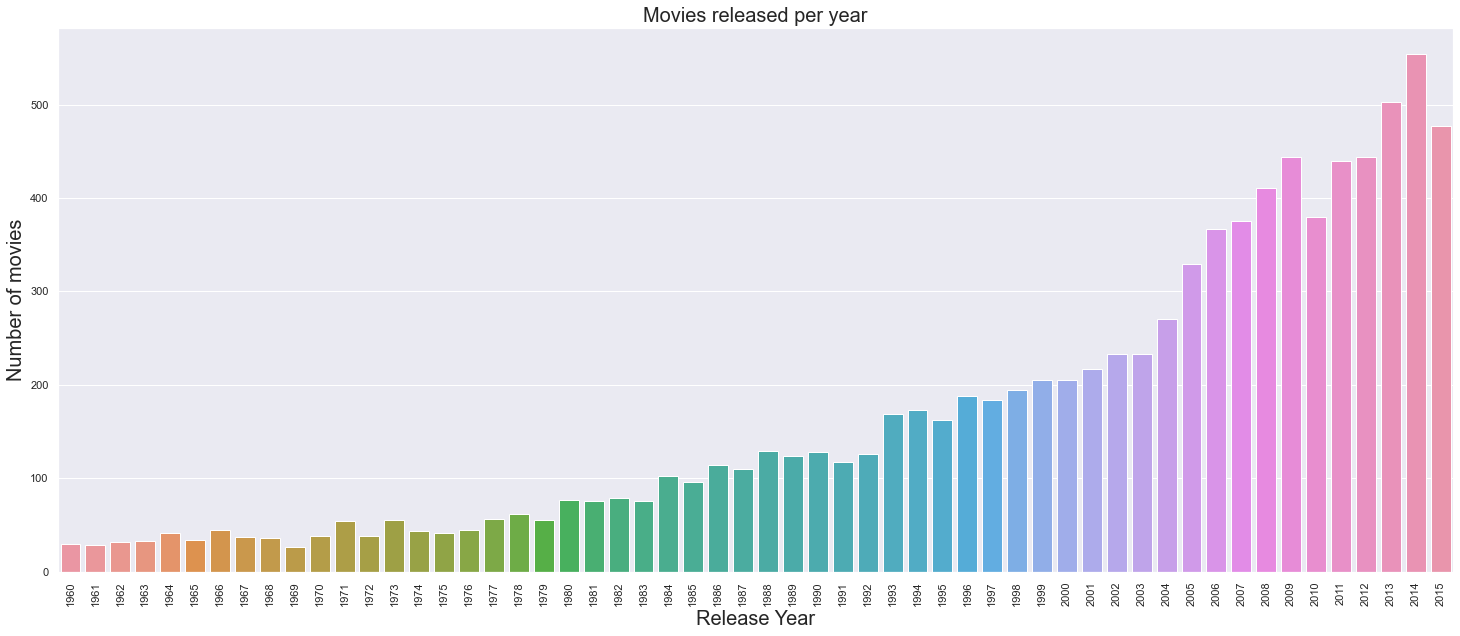

In [30]:
# Let's get the number of movies produced every year

plt.figure(figsize=(25,10))
sns.countplot(df['release_year'])
plt.title('Movies released per year', fontsize = 20)
plt.xlabel('Release Year', fontsize = 20)
plt.ylabel('Number of movies', fontsize = 20)
plt.xticks(rotation=90)
x.set_xlim(1960)
plt.show();

> 2014 in the lead with more than 700 movies, and as we can see the number of released movies is getting significantly higher every year

--------

<a id='conclusions'></a>
# Conclusions

At the beggining of the project we stated 4 questions, but in order to get to the answeres we had to go through the dataset wrandling cleaning, and analyzing. And since we're done with all of that, let's see how we answered them:

--------

#### What's the average movies runtime throughout the decades?
The most popular movies' runtime has always been around 90 minutes and the average is up to 120 minutes.

#### Who's the most successful director ever?
Considering only this dataset, It was 'Woody Allen' but that's debateable.


#### What're the most profitable movies in our Dataset?
That was -by far- James Cameron's (2009) Avatar.


#### What're the most used keywords in movies?

There were various common used words, but "Based, Independent, Director" stood out

#### How many movies were produced every year?
This question made us realize that we've been making more and more movies every year throughout the last decade, with the highest number of movies in 2015 with 700 movies.

--------

## Limitations
> Due to some missing values in the dataset and also not including all the information about all the movies ever made, this analysis only applies on the information from (TMDB.com). an in case we got more information we'll have better insights about the movies industry.